In [97]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dados = pd.read_csv('marketing_investimento.csv')
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
px.histogram(dados, x= 'aderencia_investimento', text_auto= True)

In [ ]:
px.histogram(dados, x= 'estado_civil', text_auto= True, color = 'aderencia_investimento', barmode= 'group')

In [ ]:
px.histogram(dados, x= 'escolaridade', text_auto= True, color = 'aderencia_investimento', barmode= 'group')

In [ ]:
px.box(dados, x= 'idade', color= 'aderencia_investimento')

In [ ]:
px.box(dados, x= 'saldo', color= 'aderencia_investimento')

In [29]:
x = dados.drop('aderencia_investimento', axis= 1)
y = dados['aderencia_investimento']

In [34]:
colunas = x.columns

In [37]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder = 'passthrough',
    sparse_threshold=0)

x = one_hot.fit_transform(x)

In [39]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [40]:
pd.DataFrame(x, columns= one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [45]:
#Esse é o método indicado para fazer a transformação da variável alvo para valores numéricos em problemas de classificação de dados.

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, ..., 1, 1, 1])

In [48]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y,  random_state = 5)

In [53]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_teste, y_teste)

# O modelo obteve 60% de acerto porque classificou todas as amostras como "Não", que representa 60% dos dados.
# Ou seja, acertou apenas por seguir a distribuição da classe majoritária, sem realmente aprender a distinguir entre as classes.

0.6025236593059937

In [56]:
# Aplicação do modelo de arvore de decisão

In [58]:
arvore = DecisionTreeClassifier(random_state =5)
arvore.fit(x_treino, y_treino)
arvore.predict(x_teste)
arvore.score(x_teste, y_teste)

0.6656151419558359

In [61]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']

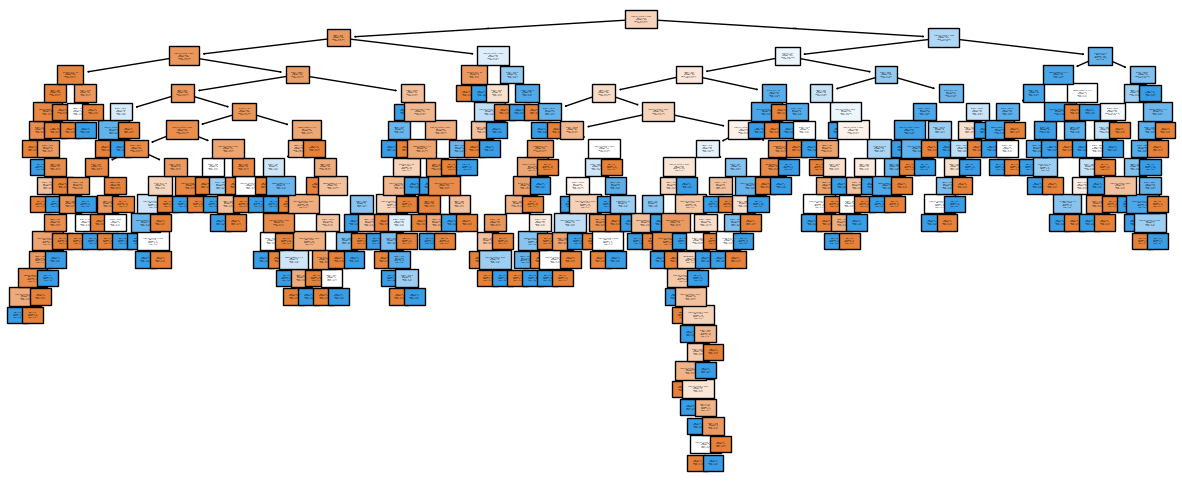

In [62]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 1, feature_names = nome_colunas);

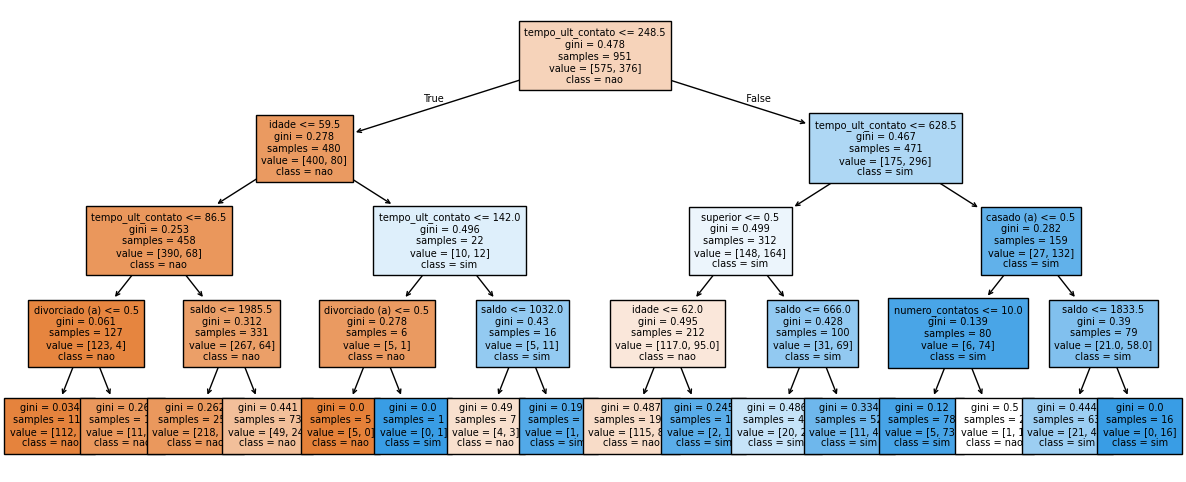

In [107]:
plt.figure(figsize = (15, 6))
arvore = DecisionTreeClassifier(max_depth = 4, random_state =5)
arvore.fit(x_treino, y_treino)

plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize = 7, feature_names = nome_colunas);

In [90]:
# Com a poda da árvore (limitando sua profundidade), o modelo teve um desempenho melhor, subindo de 66% para 71,6%.
#Isso mostra que a limitação ajuda a evitar overfitting e faz o modelo aprender padrões mais gerais dos dados.

arvore.score(x_treino, y_treino)


0.7339642481598317

In [91]:
arvore.score(x_teste, y_teste)

0.6845425867507886

In [ ]:
# ALGORITMOS KNN

In [100]:
knn = KNeighborsClassifier()
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)
knn.fit(x_treino_normalizado, y_treino)
x_teste_normalizado = normalizacao.transform(x_teste)
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

In [116]:
# verificando qual modelo teve o melhor desempenho

print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.722397476340694
Acurácia KNN: 0.6876971608832808


In [111]:
import pickle
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [112]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

In [115]:
novo_dado = {
    'idade': [45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

novo_dado = pd.DataFrame(novo_dado)
novo_dado

novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])